# Coursera Capstone Project (Battle Of Neighborhoods)

## Applied Data science Capstone by Coursera/IBM

### Table of contents

* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)



## Introduction: Business Problem <a href=#introduction></a>

In this project I will be exploring the location data for <b>Toronto, Canada</b> to come up with possible areas that can be used to open an <b>Chinese restaurant</b> This can be used by any stakeholders who may be looking for an optimal location to open a Chinese restaurant. The stakeholders are looking forward to invest in one of these areas and would want a location that they can be able to make the best out of what they are investing that is such that they dont open in a wrong location or a place where they may never be able to make profit since its a business and not some charity organization.
So for this project We are going to focus on areas that <b>do not have any Chinese restaurant</b> and as well as areas that are <b>not crowded with any restaurants yet</b>, also we will also look at areas that have a dense population. These will serve as the key elements we will be using for our analysis
    
For this we will be using our analytics knowledge to come up with few possible locations that we will be suggesting for the stakeholders involved

## Data <a href=#data></a>

For this project we will focus on using data that is related to the conditions that we have mentioned above like

* number Chinese restaurants in each neighborhood
* number of people living per the surface area in the neighborhoods 
* number of restaurants in each neighborhood

The sources we will be using are:
 Foursquare api in order to get the neighborhoods around Toronto, the number of restaurants and the type of restaurants located in them. This is going to help us get all the venues that are in all the locations in Toronto. The category we are going to be using here is food so that we get only data related to food. With this data we will be analysing to see areas where we can suggest to open the restaurants
 We will also use the <b>Google's geopy </b> api in order to get the location data of Toronto city like the longitude and latitud. This is going to help us when we are trying to plot the various locations as are on the map of Toronto
 <p> We will also be scraping data on Toronto neighborhoods from a wikipedia page using the beautiful soup package. This data will contain all the Boroughs that are in Toronto as well as their neighborhoods. This data will also have the location data (longitude and longitude) which we will use to get the venues with the foursquare api 


In [2]:
# Getting the Toronto neighborhood data from a wikipedia page
import requests
from bs4 import BeautifulSoup


In [3]:
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'

In [4]:
#Getting the data
page = requests.get(url)
html = page.text
soup = BeautifulSoup(html)

In [5]:
table = soup.find_all('table', {'class': "wikitable sortable"})

In [6]:
for row in table:
    col = row.find_all('tr')

In [7]:
import pandas as pd
l = []
for tr in col:
    td = tr.find_all('td')
    row = [tr.text for tr in td]
    l.append(row)
df = pd.DataFrame(l, columns=["PostalCode", "Borough", "Neighborhood"])

In [8]:
df.head()

,PostalCode,Borough,Neighborhood
0,None,None,None
1,M1A\n,Not assigned\n,Not assigned\n
2,M2A\n,Not assigned\n,Not assigned\n
3,M3A\n,North York\n,Parkwoods\n
4,M4A\n,North York\n,Victoria Village\n


In [9]:
df = df[df['Borough'] != 'Not assigned\n']

In [10]:
df = df.drop(index=0)

In [11]:
df.head()

,PostalCode,Borough,Neighborhood
3,M3A\n,North York\n,Parkwoods\n
4,M4A\n,North York\n,Victoria Village\n
5,M5A\n,Downtown Toronto\n,"Regent Park, Harbourfront\n"
6,M6A\n,North York\n,"Lawrence Manor, Lawrence Heights\n"
7,M7A\n,Downtown Toronto\n,"Queen's Park, Ontario Provincial Government\n"


In [12]:
df['PostalCode'] = df['PostalCode'].str.replace(r'\n', '')

In [13]:
df['Borough'] = df['Borough'].str.replace(r'\n', '')

In [14]:
df['Neighborhood'] = df['Neighborhood'].str.replace(r'\n','')

In [15]:
df = df.reset_index()

In [16]:
df.head()

,index,PostalCode,Borough,Neighborhood
0,3,M3A,North York,Parkwoods
1,4,M4A,North York,Victoria Village
2,5,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,6,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,7,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [17]:
df = df.drop(columns=['index'])
df.head()
# df.rename({'PostalCode': 'Postal Code'})

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [18]:
df = df.rename(columns={'PostalCode': 'Postal Code'})

In [19]:
df

,Postal Code,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
99,M4Y,Downtown Toronto,Church and Wellesley
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C..."
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."


In [20]:
geo = pd.read_csv('Geospatial_Coordinates.csv')

We already have the location data for all the neighborhoods in Toronto downloaded so we are going to be merging it with our neighborhood dataset so that we can have one complete dataset that has the neighborhoods and their geographical locations

In [21]:
Toronto_df = pd.merge(df, geo, on='Postal Code')

In [22]:
Toronto_df.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


Now that we have successfully gotten the neighborhoods and their geographical locations we will then use the geopy api to get the location cordinates for Toronto and visualize the various points on the map using folium 

In [23]:
import geopy
from geopy.geocoders import Nominatim
address = 'Toronto'

geolocator = Nominatim(user_agent='to_explorer')
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print("The longitude and latitude of {} are {} and {}".format(address, longitude, latitude))

The longitude and latitude of Toronto are -79.3839347 and 43.6534817


In [24]:
import folium 


In [25]:
m = folium.Map(location=[latitude, longitude], zoom_start=10)

In [26]:
#Adding markers to the map
for lat, long, borough, neighborhood in zip(Toronto_df['Latitude'], Toronto_df['Longitude'], Toronto_df['Borough'], Toronto_df['Neighborhood']):
    label = "{}, {}".format(neighborhood, borough)
    label = folium.Popup(label)
    folium.CircleMarker(
    location= [lat, long],
    popup = label,
    color='red',
    fill = True,
    fill_color = 'blue',
    fill_opacity =0.7,
#     parse_html =False
    ).add_to(m)
    
m

In [42]:
# Reading toronto data to extract population
pop = pd.read_csv('toronto_test.csv')

In [43]:
pop.head()

,PostalCode,Borough,Neighbourhood Number,"Population, 2016",Population density per square kilometre,Land area in square kilometres,Total - Household total income groups in 2015,"Under $5,000","$5,000 to $9,999","$10,000 to $14,999",...,Chinese,Black,Filipino,Latin American,Arab,Southeast Asian,West Asian,Korean,Japanese,White
0,M1B,Scarborough,263.0,90290.0,6208.0,45.74,26825.0,290.0,240.0,420.0,...,6.00,16.49,9.92,1.41,0.84,0.55,1.32,0.16,0.15,14.64
1,M1C,Scarborough,134.0,12494.0,2403.0,5.20,3700.0,60.0,25.0,45.0,...,7.64,12.41,6.44,1.64,0.68,0.68,0.80,1.04,0.28,25.49
2,M1E,Scarborough,411.0,54764.0,8570.0,19.04,19855.0,315.0,540.0,815.0,...,3.44,15.05,8.04,1.74,0.50,0.90,1.29,0.37,0.53,43.03
3,M1G,Scarborough,137.0,53485.0,4345.0,12.31,18445.0,435.0,455.0,685.0,...,6.95,10.91,7.65,1.39,1.14,0.59,2.47,0.39,0.19,23.36
4,M1H,Scarborough,127.0,29960.0,4011.0,7.47,10765.0,615.0,220.0,255.0,...,14.69,6.38,9.63,1.77,1.12,1.03,2.72,0.68,0.52,26.77


In [49]:
new = pop[['PostalCode', 'Population density per square kilometre']]
new = new.rename(columns = {'PostalCode': 'Postal Code'} )
Toronto_pop = pd.merge(Toronto_df, new, on='Postal Code')

In [50]:
Toronto_pop.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Population density per square kilometre
0,M3A,North York,Parkwoods,43.753259,-79.329656,4691.0
1,M4A,North York,Victoria Village,43.725882,-79.315572,3710.0
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,25823.0
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,3614.0
4,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353,6208.0


In [67]:
names = Toronto_pop['Neighborhood'].values
lati  = Toronto_pop['Latitude'].values
longi  = Toronto_pop['Longitude'].values

## Foursquare api
We will be using the foursquare api to get all the restaurants that are located in our neighborhood and for this we will need to use our credentials to make api calls to get our data, we will also need to use it to get 
the category or type of restaurants that are found in these areas

In [109]:
# Getting foursquare api credentials


In [1]:
# Getting restaurants in the neighborhood

Now we will need the get the number of restaurants found in each location using the foursquare api

In [69]:
category = '4d4b7105d754a06374d81259'
VERSION = '20180724'
radius = 500
limit = 50
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&categoryId={}&radius={}&limit={}'.format(
        CLIENT_ID, CLIENT_SECRET, VERSION, latitude, longitude, category, radius, limit)

In [77]:
def get_nearby_venues(names, latitudes, longitudes, radius=500, LIMIT = 100):
    venues_list = []
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    return(nearby_venues)


In [78]:
venue_df = get_nearby_venues(names, lati, longi)

Parkwoods
Victoria Village
Regent Park, Harbourfront
Lawrence Manor, Lawrence Heights
Malvern, Rouge
Don Mills
Parkview Hill, Woodbine Gardens
Garden District, Ryerson
West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale
Rouge Hill, Port Union, Highland Creek
Don Mills
Woodbine Heights
St. James Town
Humewood-Cedarvale
Eringate, Bloordale Gardens, Old Burnhamthorpe, Markland Wood
Guildwood, Morningside, West Hill
The Beaches
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Cedarbrae
Hillcrest Village
Bathurst Manor, Wilson Heights, Downsview North
Thorncliffe Park
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Scarborough Village
Fairview, Henry Farm, Oriole
Northwood Park, York University
East Toronto, Broadview North (Old East York)
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
Kennedy Park, Ionview, East Birchmount Park
Bayview Village
Downsview
The Danforth West, Riverdale
Toronto Dominion Centre, Design Exchange
Brockton, 

In [79]:
venue_df.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park
1,Parkwoods,43.753259,-79.329656,Variety Store,43.751974,-79.333114,Food & Drink Shop
2,Victoria Village,43.725882,-79.315572,Victoria Village Arena,43.723481,-79.315635,Hockey Arena
3,Victoria Village,43.725882,-79.315572,Portugril,43.725819,-79.312785,Portuguese Restaurant
4,Victoria Village,43.725882,-79.315572,Tim Hortons,43.725517,-79.313103,Coffee Shop


In [80]:
venue_df.shape[0]

1667

In [81]:
venue_df['Venue Category'].unique()

array(['Park', 'Food & Drink Shop', 'Hockey Arena',
       'Portuguese Restaurant', 'Coffee Shop', 'Pizza Place', 'Bakery',
       'Distribution Center', 'Spa', 'Restaurant', 'Breakfast Spot',
       'Pub', 'Gym / Fitness Center', 'Historic Site', 'Farmers Market',
       'Dessert Shop', 'Chocolate Shop', 'Performing Arts Venue',
       'French Restaurant', 'Café', 'Yoga Studio', 'Mexican Restaurant',
       'Theater', 'Event Space', 'Asian Restaurant', 'Shoe Store',
       'Ice Cream Shop', 'Electronics Store', 'Cosmetics Shop', 'Bank',
       'Beer Store', 'Health Food Store', 'Wine Shop', 'Antique Shop',
       'Boutique', 'Furniture / Home Store', 'Vietnamese Restaurant',
       'Clothing Store', 'Accessories Store', 'Miscellaneous Shop',
       'Gift Shop', 'Fast Food Restaurant', 'Print Shop', 'Gym',
       'Caribbean Restaurant', 'Japanese Restaurant', 'Gastropub',
       'Pharmacy', 'Pet Store', 'Intersection', 'Athletics & Sports',
       'Comic Shop', 'Tea Room', 'Burrito Pla

In [104]:
res = venue_df.query('`Venue Category`.str.contains("Restaurant") or `Venue Category`.str.contains("Food")', engine='python')

In [105]:
res

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1,Parkwoods,43.753259,-79.329656,Variety Store,43.751974,-79.333114,Food & Drink Shop
3,Victoria Village,43.725882,-79.315572,Portugril,43.725819,-79.312785,Portuguese Restaurant
11,"Regent Park, Harbourfront",43.654260,-79.360636,Impact Kitchen,43.656369,-79.356980,Restaurant
27,"Regent Park, Harbourfront",43.654260,-79.360636,Cluny Bistro & Boulangerie,43.650565,-79.357843,French Restaurant
33,"Regent Park, Harbourfront",43.654260,-79.360636,El Catrin,43.650601,-79.358920,Mexican Restaurant
...,...,...,...,...,...,...,...
1643,"First Canadian Place, Underground city",43.648429,-79.382280,Thai Island,43.649146,-79.383798,Thai Restaurant
1644,"First Canadian Place, Underground city",43.648429,-79.382280,JaBistro,43.649687,-79.388090,Sushi Restaurant
1645,"First Canadian Place, Underground city",43.648429,-79.382280,Ruby Thai (First Canadian Place),43.649091,-79.381600,Thai Restaurant
1647,"First Canadian Place, Underground city",43.648429,-79.382280,Copacabana Grilled Brazilian,43.648333,-79.388151,Brazilian Restaurant


In [106]:
res = res.reset_index()


In [107]:
res

,index,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,1,Parkwoods,43.753259,-79.329656,Variety Store,43.751974,-79.333114,Food & Drink Shop
1,3,Victoria Village,43.725882,-79.315572,Portugril,43.725819,-79.312785,Portuguese Restaurant
2,11,"Regent Park, Harbourfront",43.654260,-79.360636,Impact Kitchen,43.656369,-79.356980,Restaurant
3,27,"Regent Park, Harbourfront",43.654260,-79.360636,Cluny Bistro & Boulangerie,43.650565,-79.357843,French Restaurant
4,33,"Regent Park, Harbourfront",43.654260,-79.360636,El Catrin,43.650601,-79.358920,Mexican Restaurant
...,...,...,...,...,...,...,...,...
377,1643,"First Canadian Place, Underground city",43.648429,-79.382280,Thai Island,43.649146,-79.383798,Thai Restaurant
378,1644,"First Canadian Place, Underground city",43.648429,-79.382280,JaBistro,43.649687,-79.388090,Sushi Restaurant
379,1645,"First Canadian Place, Underground city",43.648429,-79.382280,Ruby Thai (First Canadian Place),43.649091,-79.381600,Thai Restaurant
380,1647,"First Canadian Place, Underground city",43.648429,-79.382280,Copacabana Grilled Brazilian,43.648333,-79.388151,Brazilian Restaurant


In [108]:
final_df = res.drop(columns=['index'])
final_df

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.753259,-79.329656,Variety Store,43.751974,-79.333114,Food & Drink Shop
1,Victoria Village,43.725882,-79.315572,Portugril,43.725819,-79.312785,Portuguese Restaurant
2,"Regent Park, Harbourfront",43.654260,-79.360636,Impact Kitchen,43.656369,-79.356980,Restaurant
3,"Regent Park, Harbourfront",43.654260,-79.360636,Cluny Bistro & Boulangerie,43.650565,-79.357843,French Restaurant
4,"Regent Park, Harbourfront",43.654260,-79.360636,El Catrin,43.650601,-79.358920,Mexican Restaurant
...,...,...,...,...,...,...,...
377,"First Canadian Place, Underground city",43.648429,-79.382280,Thai Island,43.649146,-79.383798,Thai Restaurant
378,"First Canadian Place, Underground city",43.648429,-79.382280,JaBistro,43.649687,-79.388090,Sushi Restaurant
379,"First Canadian Place, Underground city",43.648429,-79.382280,Ruby Thai (First Canadian Place),43.649091,-79.381600,Thai Restaurant
380,"First Canadian Place, Underground city",43.648429,-79.382280,Copacabana Grilled Brazilian,43.648333,-79.388151,Brazilian Restaurant


In [122]:
import seaborn as sns
Toronto_pop.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Population density per square kilometre
0,M3A,North York,Parkwoods,43.753259,-79.329656,4691.0
1,M4A,North York,Victoria Village,43.725882,-79.315572,3710.0
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,25823.0
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,3614.0
4,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353,6208.0


In [129]:
df = pd.merge(Toronto_pop, final_df, on="Neighborhood")

In [130]:
df.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Population density per square kilometre,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,M3A,North York,Parkwoods,43.753259,-79.329656,4691.0,43.753259,-79.329656,Variety Store,43.751974,-79.333114,Food & Drink Shop
1,M4A,North York,Victoria Village,43.725882,-79.315572,3710.0,43.725882,-79.315572,Portugril,43.725819,-79.312785,Portuguese Restaurant
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,25823.0,43.654260,-79.360636,Impact Kitchen,43.656369,-79.356980,Restaurant
3,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,25823.0,43.654260,-79.360636,Cluny Bistro & Boulangerie,43.650565,-79.357843,French Restaurant
4,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,25823.0,43.654260,-79.360636,El Catrin,43.650601,-79.358920,Mexican Restaurant


In [131]:
df = df.drop(columns=['Neighborhood Latitude', 'Neighborhood Longitude'])

In [132]:
df.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Population density per square kilometre,Venue,Venue Latitude,Venue Longitude,Venue Category
0,M3A,North York,Parkwoods,43.753259,-79.329656,4691.0,Variety Store,43.751974,-79.333114,Food & Drink Shop
1,M4A,North York,Victoria Village,43.725882,-79.315572,3710.0,Portugril,43.725819,-79.312785,Portuguese Restaurant
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,25823.0,Impact Kitchen,43.656369,-79.356980,Restaurant
3,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,25823.0,Cluny Bistro & Boulangerie,43.650565,-79.357843,French Restaurant
4,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,25823.0,El Catrin,43.650601,-79.358920,Mexican Restaurant


In [172]:
grouped_df = df.groupby('Neighborhood').count()
pop = Toronto_pop[['Neighborhood', 'Population density per square kilometre']]
dff = pd.merge(grouped_df, pop, on = 'Neighborhood')

In [173]:
filtered_df = dff[['Neighborhood', 'Venue Category', 'Population density per square kilometre_y']]

In [174]:
filtered_df = filtered_df.rename(columns={'Venue Category': 'Number of Restaurants'})
filtered_df.head()

,Neighborhood,Number of Restaurants,Population density per square kilometre_y
0,Agincourt,1,3034.0
1,"Bathurst Manor, Wilson Heights, Downsview North",3,9693.0
2,Bayview Village,2,4195.0
3,"Bedford Park, Lawrence Manor East",11,4209.0
4,"Brockton, Parkdale Village, Exhibition Place",2,14280.0


In [175]:
filtered_df.shape[0]

60

In [176]:
df['is_chinese'] = df['Venue Category']

In [177]:
df = df.drop(columns=['is_chinese'])

In [178]:
 df['Venue Category'].unique()

array(['Food & Drink Shop', 'Portuguese Restaurant', 'Restaurant',
       'French Restaurant', 'Mexican Restaurant', 'Asian Restaurant',
       'Health Food Store', 'Vietnamese Restaurant',
       'Fast Food Restaurant', 'Caribbean Restaurant',
       'Japanese Restaurant', 'Italian Restaurant', 'Dim Sum Restaurant',
       'Chinese Restaurant', 'Ramen Restaurant', 'Thai Restaurant',
       'Modern European Restaurant', 'New American Restaurant',
       'Middle Eastern Restaurant', 'Seafood Restaurant',
       'Ethiopian Restaurant', 'Food Truck', 'American Restaurant',
       'Vegetarian / Vegan Restaurant', 'German Restaurant',
       'Comfort Food Restaurant', 'Moroccan Restaurant',
       'Belgian Restaurant', 'Korean Restaurant', 'Sushi Restaurant',
       'Falafel Restaurant', 'Indian Restaurant', 'Hakka Restaurant',
       'Mediterranean Restaurant', 'Colombian Restaurant',
       'Brazilian Restaurant', 'Gluten-free Restaurant',
       'Latin American Restaurant', 'Food Court',

In [179]:

df['is_chinese'] = [1 if i == 'Chinese Restaurant' else 0 for i in df['Venue Category']]

In [180]:
df.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Population density per square kilometre,Venue,Venue Latitude,Venue Longitude,Venue Category,is_chinese
0,M3A,North York,Parkwoods,43.753259,-79.329656,4691.0,Variety Store,43.751974,-79.333114,Food & Drink Shop,0
1,M4A,North York,Victoria Village,43.725882,-79.315572,3710.0,Portugril,43.725819,-79.312785,Portuguese Restaurant,0
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,25823.0,Impact Kitchen,43.656369,-79.356980,Restaurant,0
3,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,25823.0,Cluny Bistro & Boulangerie,43.650565,-79.357843,French Restaurant,0
4,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,25823.0,El Catrin,43.650601,-79.358920,Mexican Restaurant,0


In [188]:
reschin = df[['Neighborhood', 'is_chinese']]

dffchin = pd.merge(filtered_df, reschin, on = 'Neighborhood')

In [190]:
dffchin['is_chinese'].value_counts()

0    422
1     17
Name: is_chinese, dtype: int64

In [191]:
dffchin.head()

,Neighborhood,Number of Restaurants,Population density per square kilometre_y,is_chinese
0,Agincourt,1,3034.0,0
1,"Bathurst Manor, Wilson Heights, Downsview North",3,9693.0,0
2,"Bathurst Manor, Wilson Heights, Downsview North",3,9693.0,0
3,"Bathurst Manor, Wilson Heights, Downsview North",3,9693.0,0
4,Bayview Village,2,4195.0,1


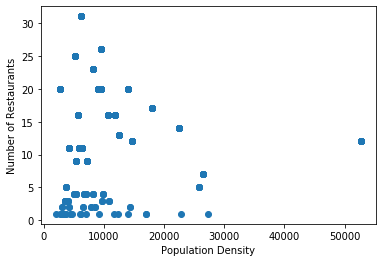

In [202]:
import matplotlib.pyplot as plt
# ax = dffchin.plot.bar(x='Neighborhood', y='Number of Restaurants')
# ax
X = dffchin[['Number of Restaurants', 'Population density per square kilometre_y']]
plt.scatter( X['Population density per square kilometre_y'], X['Number of Restaurants'])
plt.xlabel('Population Density')
plt.ylabel('Number of Restaurants')
plt.show()


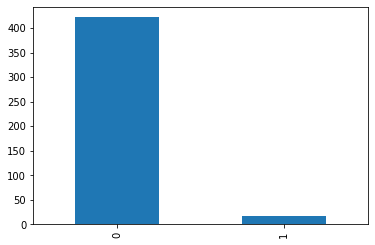

In [195]:
dffchin['is_chinese'].value_counts().plot(kind='bar')

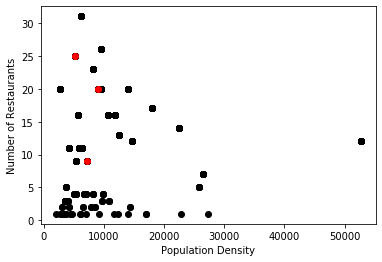

In [210]:
K = 3
Centroids = (X.sample(n=K))
plt.scatter(X["Population density per square kilometre_y"],X["Number of Restaurants"],c='black')
plt.scatter(Centroids["Population density per square kilometre_y"],Centroids["Number of Restaurants"],c='red')
plt.xlabel('Population Density')
plt.ylabel('Number of Restaurants')
plt.show()

In [211]:
diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["Population density per square kilometre_y"]-row_d["Population density per square kilometre_y"])**2
            d2=(row_c["Number of Restaurants"]-row_d["Number of Restaurants"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["Number of Restaurants","Population density per square kilometre_y"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['Number of Restaurants'] - Centroids['Number of Restaurants']).sum() + (Centroids_new['Population density per square kilometre_y'] - Centroids['Population density per square kilometre_y']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["Number of Restaurants","Population density per square kilometre_y"]]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


4979.076663409428
5368.382141120757
7028.071473930083
5957.616465995935
904.8986199413018
63.951734501278665
0.0


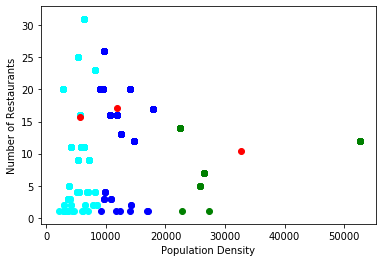

In [214]:
color=['blue','green','cyan']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["Population density per square kilometre_y"],data["Number of Restaurants"],c=color[k])
plt.scatter(Centroids["Population density per square kilometre_y"],Centroids["Number of Restaurants"],c='red')
plt.xlabel('Population Density')
plt.ylabel('Number of Restaurants')
plt.show()

In [222]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(dffchin[['Number of Restaurants', 'is_chinese', 'Population density per square kilometre_y']])
pd.DataFrame(scaled).describe()

,0,1,2
count,4.390000e+02,4.390000e+02,4.390000e+02
mean,8.547959e-17,-1.617284e-16,6.651222e-17
std,1.001141e+00,1.001141e+00,1.001141e+00
min,-1.763748e+00,-2.007096e-01,-9.685661e-01
25%,-5.670162e-01,-2.007096e-01,-5.612369e-01
50%,3.134945e-02,-2.007096e-01,-2.343090e-01
75%,5.100420e-01,-2.007096e-01,1.321400e-01
max,1.826446e+00,4.982322e+00,4.758050e+00


In [224]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [225]:
kmeans.inertia_

873.0361372838508

Text(0, 0.5, 'Inertia')

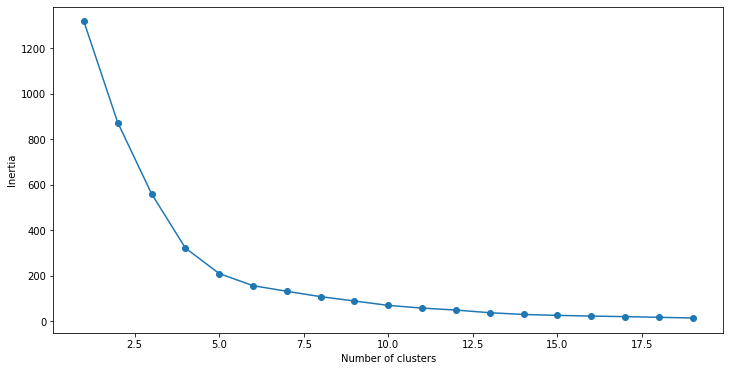

In [227]:
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [228]:
kmeans = KMeans(n_clusters=5, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(scaled)

predict = kmeans.predict(scaled)

In [229]:
frame = pd.DataFrame(scaled)
frame['cluster'] = predict
frame['cluster'].value_counts()

2    175
1    120
4    116
3     16
0     12
Name: cluster, dtype: int64

In [231]:
frame['Neighborhood'] = dffchin['Neighborhood']

In [237]:
inverse_df = scaler.inverse_transform(scaled)
# frame

In [239]:
clustered_df = pd.DataFrame(inverse_df)

In [241]:
clustered_df['Clusters'] = predict
clustered_df['Neighborhood'] = dffchin['Neighborhood']
clustered_df.head()

,0,1,2,Clusters,Neighborhood
0,1.0,0.0,3034.0,4,Agincourt
1,3.0,0.0,9693.0,4,"Bathurst Manor, Wilson Heights, Downsview North"
2,3.0,0.0,9693.0,4,"Bathurst Manor, Wilson Heights, Downsview North"
3,3.0,0.0,9693.0,4,"Bathurst Manor, Wilson Heights, Downsview North"
4,2.0,1.0,4195.0,3,Bayview Village


In [257]:
clustered_df = clustered_df.rename(columns={0 : "Number of Restaurants", 1 : "is_chinese", 2 : "Population Density"})
clustered_df.drop_duplicates(keep=False,inplace=True) 
clustered_df.head()

,Number of Restaurants,is_chinese,Population Density,Clusters,Neighborhood
0,1.0,0.0,3034.0,4,Agincourt
4,2.0,1.0,4195.0,3,Bayview Village
5,2.0,0.0,4195.0,4,Bayview Village
19,1.0,0.0,22824.0,1,"CN Tower, King and Spadina, Railway Lands, Har..."
47,4.0,1.0,5073.0,3,"Clarks Corners, Tam O'Shanter, Sullivan"


In [258]:
cluster_0 = clustered_df.query('Clusters == 0').reset_index(drop=True)
cluster_0

,Number of Restaurants,is_chinese,Population Density,Clusters,Neighborhood
0,12.0,1.0,52656.0,0,"St. James Town, Cabbagetown"


In [259]:
cluster_1 = clustered_df.query('Clusters == 1').reset_index(drop=True)
cluster_1

,Number of Restaurants,is_chinese,Population Density,Clusters,Neighborhood
0,1.0,0.0,22824.0,1,"CN Tower, King and Spadina, Railway Lands, Har..."
1,1.0,0.0,27380.0,1,Davisville North


In [260]:
cluster_2 = clustered_df.query('Clusters == 2').reset_index(drop=True)
cluster_2

,Number of Restaurants,is_chinese,Population Density,Clusters,Neighborhood


In [261]:
cluster_3 = clustered_df.query('Clusters == 3').reset_index(drop=True)
cluster_3

,Number of Restaurants,is_chinese,Population Density,Clusters,Neighborhood
0,2.0,1.0,4195.0,3,Bayview Village
1,4.0,1.0,5073.0,3,"Clarks Corners, Tam O'Shanter, Sullivan"
2,4.0,1.0,6976.0,3,"Dorset Park, Wexford Heights, Scarborough Town..."
3,13.0,1.0,12488.0,3,"Fairview, Henry Farm, Oriole"
4,20.0,1.0,9511.0,3,"Garden District, Ryerson"
5,12.0,1.0,14753.0,3,"Harbourfront East, Union Station, Toronto Islands"
6,1.0,1.0,7031.0,3,"Kennedy Park, Ionview, East Birchmount Park"
7,26.0,1.0,9601.0,3,"Toronto Dominion Centre, Design Exchange"
8,9.0,1.0,5395.0,3,"University of Toronto, Harbord"
9,2.0,1.0,7791.0,3,Westmount


In [262]:
cluster_4 = clustered_df.query('Clusters == 4').reset_index(drop=True)
cluster_4

,Number of Restaurants,is_chinese,Population Density,Clusters,Neighborhood
0,1.0,0.0,3034.0,4,Agincourt
1,2.0,0.0,4195.0,4,Bayview Village
2,1.0,0.0,14094.0,4,"Cliffside, Cliffcrest, Scarborough Village West"
3,1.0,0.0,17081.0,4,"Dufferin, Dovercourt Village"
4,1.0,0.0,12434.0,4,"Forest Hill North & West, Forest Hill Road Park"
5,1.0,0.0,3148.0,4,Hillcrest Village
6,1.0,0.0,3614.0,4,"Lawrence Manor, Lawrence Heights"
7,1.0,0.0,6208.0,4,"Malvern, Rouge"
8,1.0,0.0,9148.0,4,"Mimico NW, The Queensway West, South of Bloor,..."
9,1.0,0.0,2086.0,4,"Northwood Park, York University"
